In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact


plt.style.use('fivethirtyeight')

# Key Terms

In [20]:
# Dictionary for loading into pandas DataFrame
region_abb = {"Abbreviations":["USA", "CAN", "EUR", "JPN", "OOE", "FSU", "CEA", "CHN", "IND", "BRA", "ASI", "MPC", "ROW"],
                 "Expanded Form":["United States of America", "Canada", "Europe", "Japan", "Other OECD", "Former Soviet Union", "Central European Associates", "China", "India", "Brazil", "Other Asia", "Mexico and OPEC (Organization of the Petroleum Exporting Countries)", "Rest of World"],
                 "Annex":["Annex B", "Annex B", "Annex B", "Annex B", "Annex B", "Annex B", "Annex B", "Non-Annex B", "Non-Annex B", "Non-Annex B", "Non-Annex B", "Non-Annex B", "Non-Annex B"]}

# Loads dictionary abb into a pandas DataFrame called Abbreviations
region_abbreviations = pd.DataFrame(region_abb).set_index("Abbreviations")

sector_abb = {"Abbreviations":["GAS", "FPR", "ELE", "PPP", "OIL", "LUM", "COL", "CNS", "CRU", "TWL", "I S", "OMF", "CRP", "AGR",
"NFM", "T_T", "NMM", "SER", "TRN", "DWE", "OME", "CGD", "OMN"],
"Expanded Form":["Natural gas works", "Food products", "Electricity and heat", "Paper-pulp-print", "Refined oil products", "Wood and wood-products", 
"Coal", "Construction", "Crude Oil", "Textiles-wearing apparel-leather", "Iron and steel industry", "Other manufacturing", "Chemical industry ", "Agricultural products ",
"Agricultural products", "Trade and transport", "Non-metallic minerals", "Commercial and public services", "Transport equipment", "Dwellings", "Other machinery",
 "Investment composite", "Mining" ]}

sector_abbreviations = pd.DataFrame(sector_abb).set_index("Abbreviations")


                 
region_abbreviations

,Expanded Form,Annex
Abbreviations,,
USA,United States of America,Annex B
CAN,Canada,Annex B
EUR,Europe,Annex B
JPN,Japan,Annex B
OOE,Other OECD,Annex B
FSU,Former Soviet Union,Annex B
CEA,Central European Associates,Annex B
CHN,China,Non-Annex B
IND,India,Non-Annex B


In [21]:
sector_abbreviations

,Expanded Form
Abbreviations,
GAS,Natural gas works
FPR,Food products
ELE,Electricity and heat
PPP,Paper-pulp-print
OIL,Refined oil products
LUM,Wood and wood-products
COL,Coal
CNS,Construction
CRU,Crude Oil


## Kyoto Protocol and Carbon Leakage


  The international response to climate change is a negotiating process embodied in the United Nations Framework Convention on Climate Change (UNFCCC (1992)) and its Kyoto Protocol (UNFCCC (1997)). The Protocol calls for industrialized countries and economies in transition to limit their aggregate carbon equivalent emissions of the greenhouse gases (GHG) by the first part of the 21st century. The countries are listed in the protocol in the Annex B, so they are called Annex B countries. Developing countries have not committed themselves to reduce their greenhouse emissions because they have made minor contributions to global GHG concentrations. Unilateral emissions abatement by a subset of countries has raised serious doubts about its environmental efficiency. Abatement activities of the industrialized countries might result in a movement of the GHG emissions into the regions with no restrictions. This effect has been called leakage

*The Energy Journal, Vol. 22, No. 4 (2001), pp. 53-79*


## Breakdown of Annex B Restrictions on Regional Leakage

In [22]:
# Imports table from CSV as a pandas DataFrame 
# Drops extraneous blank 7th row
# Sets index to non-Annex B country abbreviation column
regional_decomposition = pd.read_csv("regional_decomposition.csv").drop([7], axis=0).set_index("Unnamed: 0")

regional_decomposition

,USA,CAN,EUR,JPN,OOE,FSU,CEA,Total leakage
Unnamed: 0,,,,,,,,
CHN,0.75,0.38,1.12,0.68,0.22,0.03,0.0,3.16
IND,0.20,0.03,0.19,0.10,0.03,0.01,0.0,0.56
BRA,0.11,0.02,0.09,0.05,0.01,0.00,0.0,0.28
ASI,0.45,0.06,0.53,0.25,0.07,0.01,0.0,1.37
MPC,0.96,0.15,0.88,0.40,0.11,0.04,0.0,2.54
ROW,0.61,0.11,1.53,0.26,0.08,0.01,0.0,2.58
Induced leakage,3.08,0.75,4.34,1.74,0.51,0.10,0.0,10.50


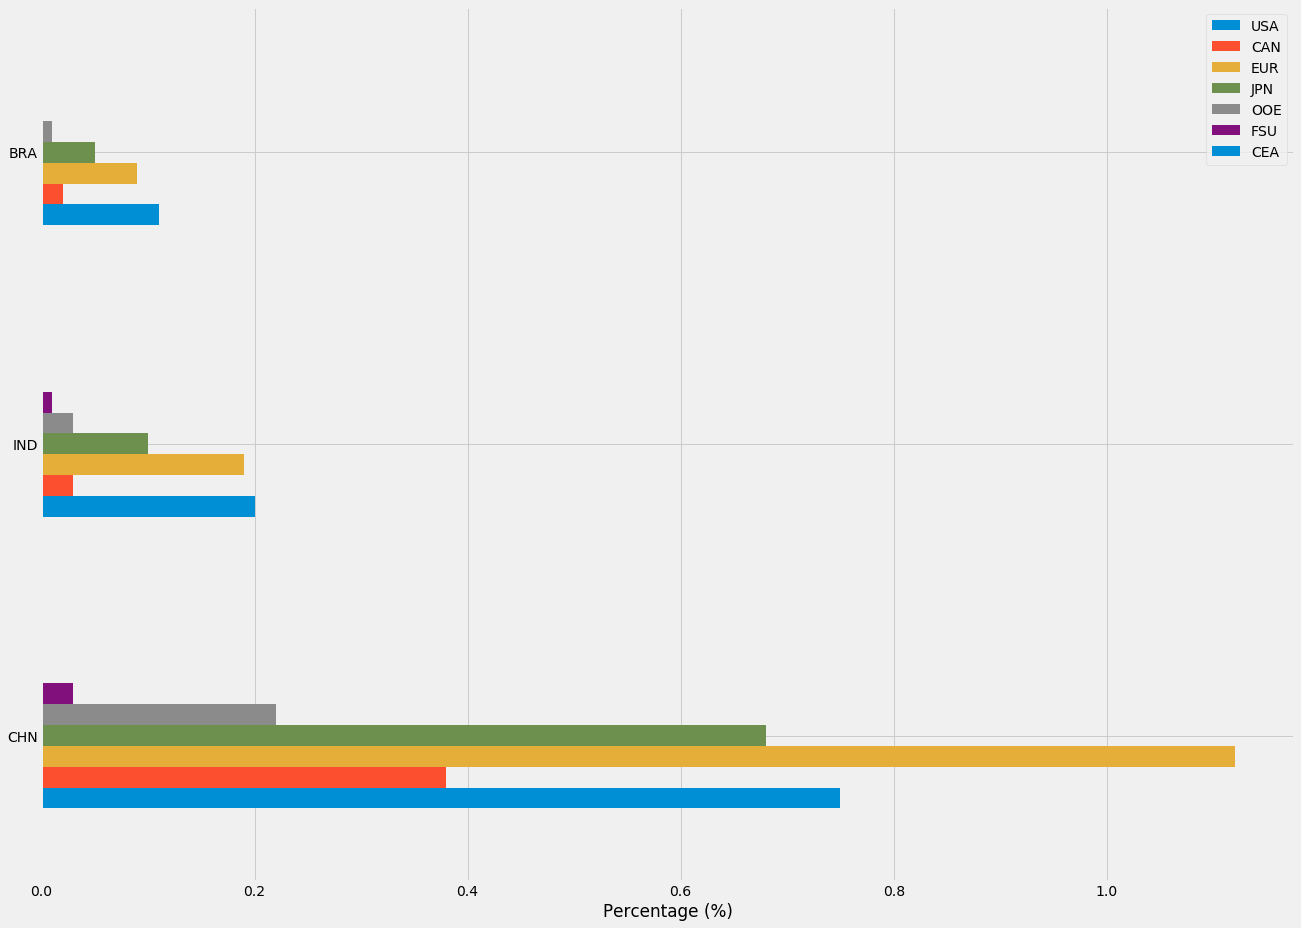

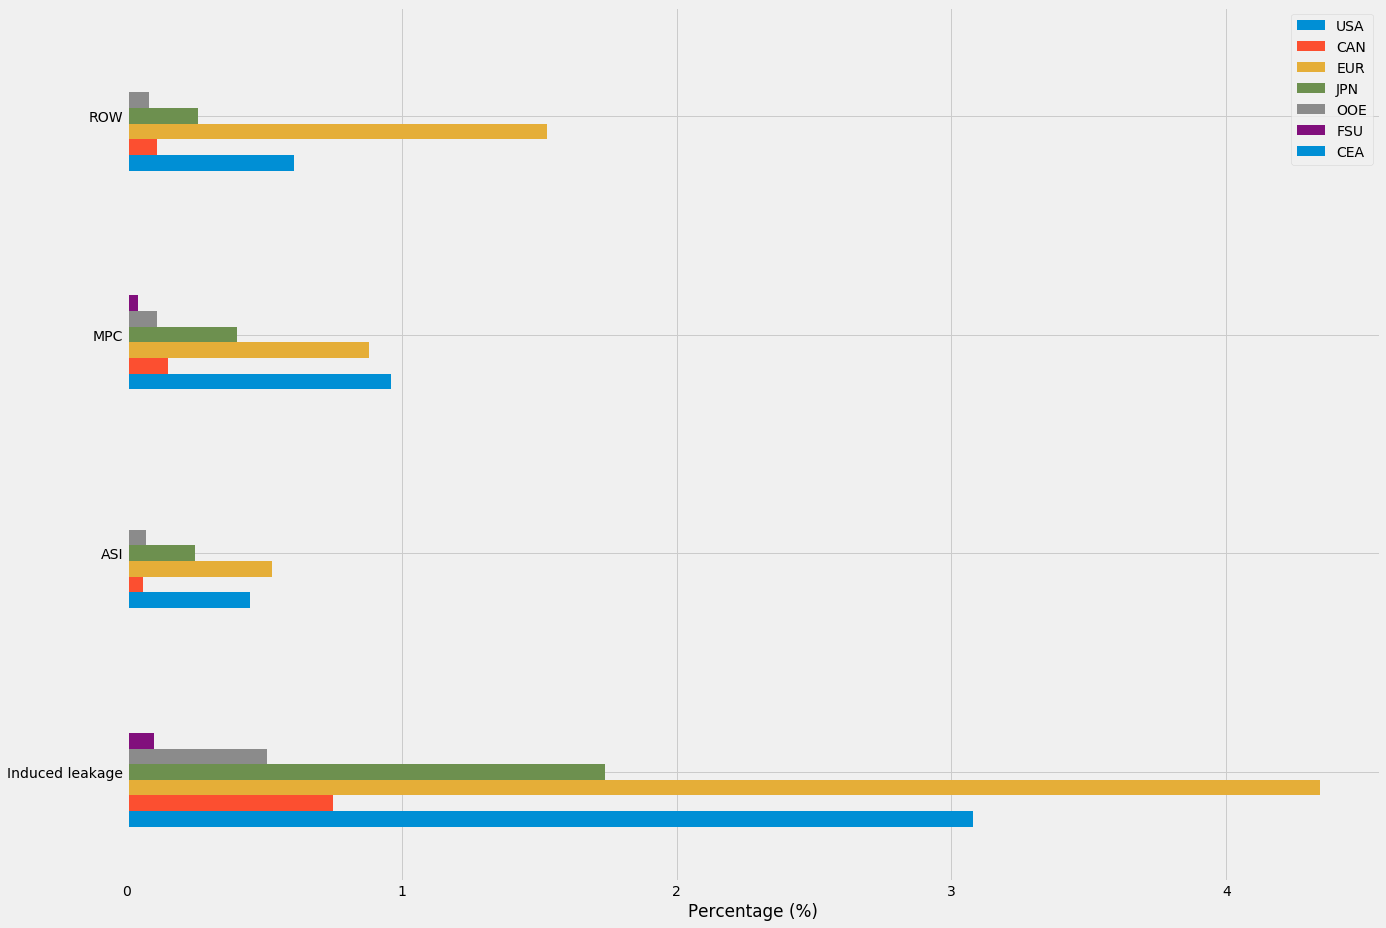

In [23]:
plt.rcParams["figure.figsize"] = (20,15)
regional_decomposition.reset_index().drop(columns=["Total leakage"]).loc[[0,1,2]].plot(kind="barh",x=0)
plt.ylabel("")
plt.xlabel("Percentage (%)")
regional_decomposition.reset_index().drop(columns=["Total leakage"]).loc[[6,3,4,5]].plot(kind="barh",x=0)
plt.ylabel("")
plt.xlabel("Percentage (%)")
plt.show()

## Leakage, Emissions, and Abatement caused by Annex B Restrictions

In [24]:
# Imports table from CSV as a pandas DataFrame 
# Sets index to data type for each row
regional_shares = pd.read_csv("regional_shares_table.csv").set_index("Unnamed: 0")

regional_shares

,USA,CAN,EUR,JPN,OOE,FSU,CEA
Unnamed: 0,,,,,,,
% leakage,29.4,7.1,41.4,16.6,4.9,0.9,0.0
% emissions,39.3,3.5,23.3,8.7,2.3,17.4,5.5
% abatement,54.2,5.1,26.0,12.4,1.9,0.3,0.0
LE ratio,1.7,4.1,3.7,4.2,4.3,0.1,-0.5
LA ratio,5.5,12.9,16.3,13.3,22.7,2.8,NaN


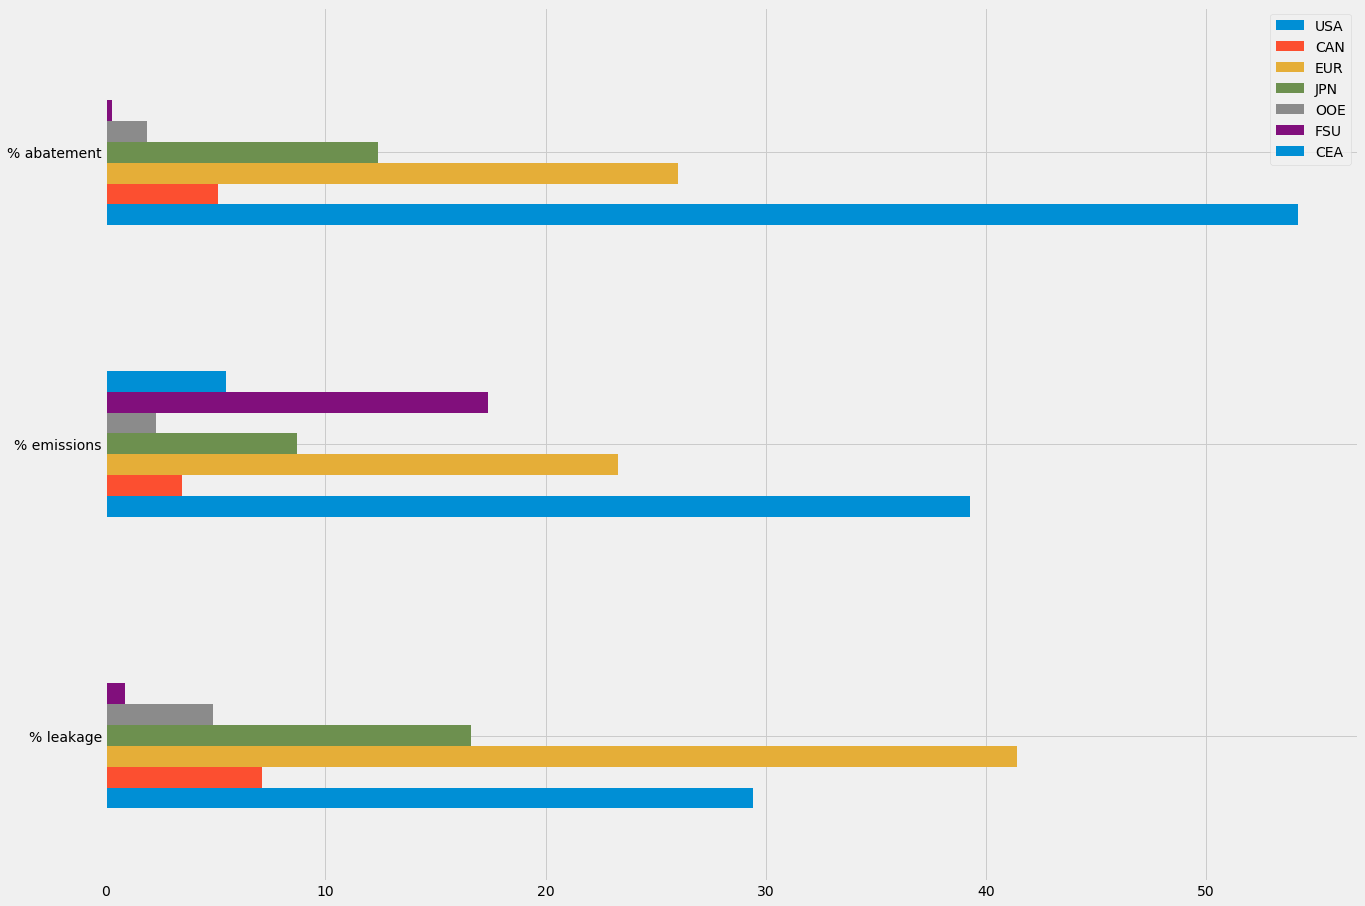

In [25]:
regional_shares.reset_index().loc[[0,1,2]].plot(kind="barh",x=0)
plt.rcParams['figure.figsize'] = [20, 30]
plt.rcParams.update({'font.size': 22})
plt.ylabel("")
plt.show()

# Regional Leakage Contribution of Fossil Fuel Taxes

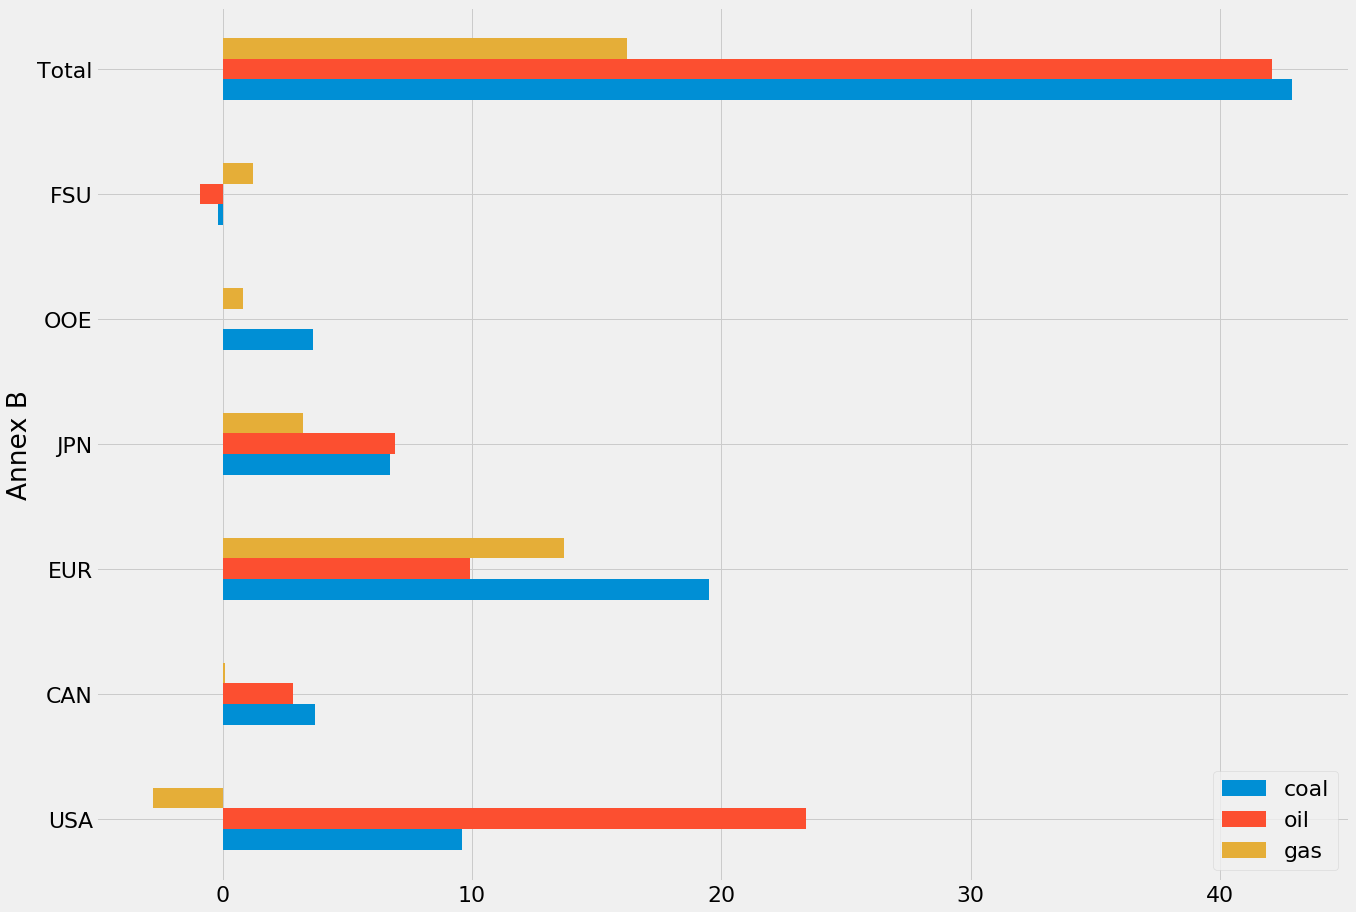

In [29]:
annex_b_taxes = pd.read_csv("regional_leakage_taxes_annex_b.csv").set_index("Annex B")
non_annex_b_taxes = pd.read_csv("regional_leakage_taxes_non_annex_b.csv").set_index("non-Annex B")

plt.rcParams['figure.figsize'] = [20, 15]
annex_b_taxes.plot(kind="barh")
plt.show()

In [15]:
non_annex_b_taxes

,coal,oil,gas
non-Annex B,,,
CHN,21.3,8.6,-0.6
IND,2.2,3.8,-0.6
BRA,0.9,2.3,-0.4
ASI,3.4,8.5,1.5
MPC,2.6,14.3,8.4
ROW,12.1,4.2,7.5
Total,42.5,41.7,15.8


# Sectoral Shares and Adjusted Leakage Ratios

In [2]:
sectoral_shares = pd.read_csv("Sectoral Shares and Adjusted Leakage Ratios - Sheet1.csv")
sectoral_shares

,Sector,% of Leakage,% of Emissions,LE Ratio,LA Ratio
0,Chemical Industry,19.9,10.5,4.3,20.5
1,Iron and Steel Industry,16.2,6.2,5.8,28.2
2,Final Industry,14.9,19.1,1.7,10.5
3,Dwellings,9.7,12.4,1.7,6.9
4,Commercial and Public Services,7.4,11.4,1.4,5.0
5,Trade and Transport,6.2,12.0,1.1,9.0
6,Non-ferrous metals,5.1,2.4,4.7,26.3
7,Non-metallic minerals,4.7,2.5,4.0,16.2
8,Mining,4.4,1.4,7.0,28.0
9,Electricity and Heat,4.1,7.1,1.2,3.6


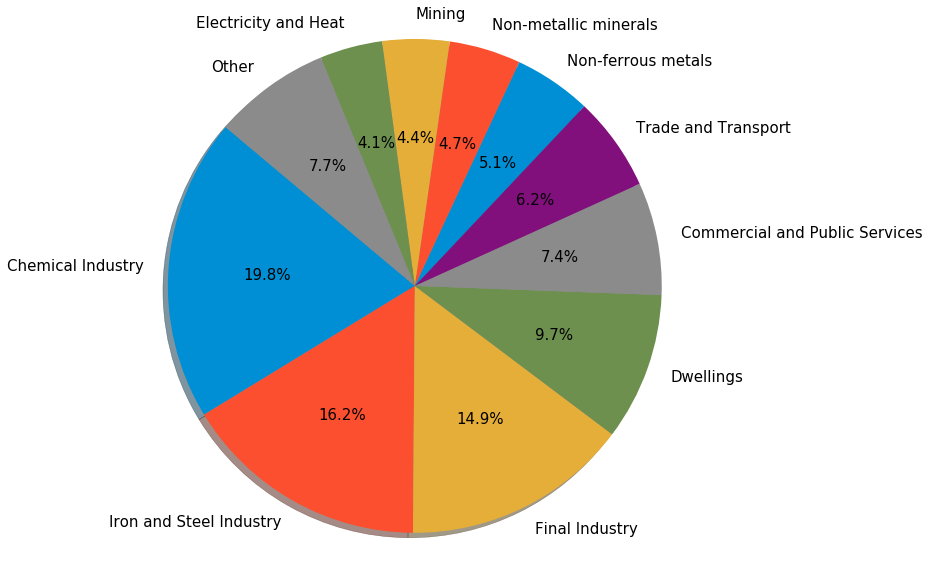

In [15]:
# Data to plot
other = 0
s_s_short = sectoral_shares
arr_remove = []
for row_ind in np.arange(s_s_short.shape[0]):
    leakage = sectoral_shares.iat[row_ind, 1]
    if leakage < 3:
        arr_remove.append(row_ind)
        other += leakage
s_s_short = s_s_short.drop(arr_remove)
labels = np.append(np.asarray(s_s_short["Sector"]), "Other")
leakage = np.append(np.asarray(s_s_short["% of Leakage"]),other)
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(leakage, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 15})
plt.axis('equal')
plt.show()

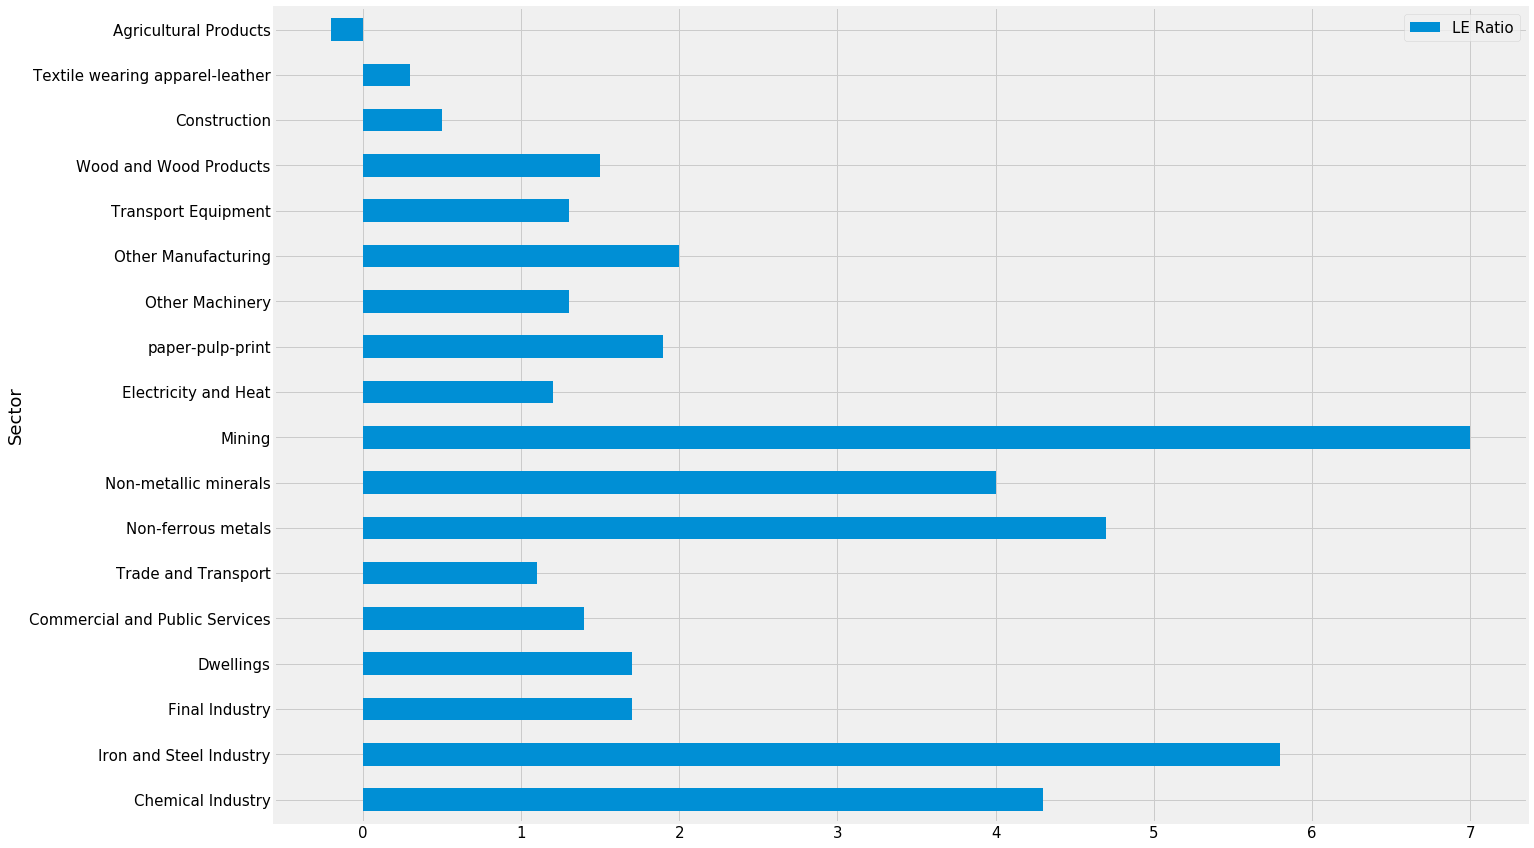

In [16]:
plt.rcParams["figure.figsize"] = (20,15)
sectoral_shares.drop(columns=["% of Leakage", "% of Emissions", "LA Ratio"]).plot(kind="barh",x=0)
plt.show()

## Interactive Leakage Ratio Demo

In [40]:

def update_plot(leak, a_a):
    increase_non_annex = leak * a_a
    net_decrease = a_a - increase_non_annex
    print("net decrease:")
    return net_decrease


leakage_ratio = widgets.FloatSlider(min=0, max=1, value=.4, description='Leakage Ratio')
annex_abatement = widgets.FloatSlider(min=1, max=300, value=100, description='(Annex Abatement in tons):')
interact(update_plot, leak = leakage_ratio, a_a = annex_abatement)



interactive(children=(FloatSlider(value=0.4, description='Leakage Ratio', max=1.0), FloatSlider(value=100.0, d…

<function __main__.update_plot(leak, a_a)>

## Further Evidence

"Regarding leakage, we find that a significant share of leakage occurs via
changes in global energy prices. Hence, none of the countervailing policies reduce
leakage rates very much—at most by 22 percent, in the case of full border
adjustments. Furthermore, 40 percent of leakage from U.S. and EU climate
policies can be attributed to other Annex B nations. "

"...shows the size of global leakage in the policy scenarios. First, we
observe that carbon leakage is highest when the European Union reduces its
emissions. The leakage rate is then up to 28 percent, compared with up to 10
percent when the United States reduces its emissions. One reason for this
difference is that the European Union is a more open economy than the United
States, meaning that imports and exports constitute a larger share of the EU
economy. This is true both for energy-intensive goods and for fossil fuels, of
which the European Union is a much bigger importer (relative to own
consumption) than the United States. This fact matters in particular for coal and
gas, where transport costs are important, leading to differentiated prices around
the world. Another reason for higher leakage with EU policies is that this region’s
energy-intensive industries are less carbon-intensive than the same industries in
the United States"

Boehringer, C., Fischer, C. & Rosendahl, K. (2010). The Global Effects of Subglobal Climate Policies. The B.E. Journal of Economic Analysis & Policy, 10(2), pp. -. Retrieved 3 May. 2019, from doi:10.2202/1935-1682.2583
